# Breast Cancer Diagnosis

This data set has been obtained from the Machine Learning Databases directory created by University of California, Irvine. The dataset contains the ID numbers of the patient, the diagnosis: M - malignant, B - benign, along with ten real-valued parameters that may have correlations to the diagnosis.

##  <font color='red'>Reading the Data and EDA</font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
data = pd.read_csv("https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We will do some basic data cleaning. The attributes of this dataset are as follows:

1. Patient. ID
2. Malignant or Benign Classification

Ten real valued are computed for each cell nucleus:

a. radius (mean of distances from center to points on the perimeter)<br>
b. texture (standard deviation of gray-scale values)<br>
c. perimeter<br>
d. area<br>
e. smoothness (local variation in radius lengths)<br>
f. compactness (perimeter² / area — 1.0)<br>
g. concavity (severity of concave portions of the contour)<br>
h. concave points (number of concave portions of the contour)<br>
i. symmetry<br>
j. fractal dimension (“coastline approximation” — 1)<br>

The mean, standard deviation and the "largest" (mean of three largest values) have been calculated for each of the attributes.

In [60]:
column_names = ['ID', 'Classification', 'radius mean', 'radius std', 'largest radius','texture mean', 'texture std',
                'largest texture', 'perimeter mean', 'perimeter std', 'largest perimeter', 'area mean', 'area std', 
                 'largest area', 'smoothness mean', 'smoothness std', 'largest smoothness', 'compactness mean', 'compactness std',
                'largest compactness', 'concavity mean', 'concavity std', 'largest concavity', 'concave points mean', 'concave points std', 
                 'largest (no. of)concave points', 'symmetry mean', 'symmetry std', 'largest symmetry', 'fractal dimension mean',
                'fractal dimension std', 'largest fractal dimension']


In [61]:
data.columns = column_names
data.head()

,ID,Classification,radius mean,radius std,largest radius,texture mean,texture std,largest texture,perimeter mean,perimeter std,...,largest concavity,concave points mean,concave points std,largest (no. of)concave points,symmetry mean,symmetry std,largest symmetry,fractal dimension mean,fractal dimension std,largest fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
data['Classification'] = pd.Categorical(data['Classification'])
data['Classification'] = data['Classification'].cat.codes
data.head()

,ID,Classification,radius mean,radius std,largest radius,texture mean,texture std,largest texture,perimeter mean,perimeter std,...,largest concavity,concave points mean,concave points std,largest (no. of)concave points,symmetry mean,symmetry std,largest symmetry,fractal dimension mean,fractal dimension std,largest fractal dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
print("Number of malignant classifications: {}".format(np.sum(data['Classification'])))
print("Number of benign classifications: {}".format(data.shape[0] - np.sum(data['Classification'])))

Number of malignant classifications: 212
Number of benign classifications: 357


In [66]:
data.isnull().sum()

ID                                0
Classification                    0
radius mean                       0
radius std                        0
largest radius                    0
texture mean                      0
texture std                       0
largest texture                   0
perimeter mean                    0
perimeter std                     0
largest perimeter                 0
area mean                         0
area std                          0
largest area                      0
smoothness mean                   0
smoothness std                    0
largest smoothness                0
compactness mean                  0
compactness std                   0
largest compactness               0
concavity mean                    0
concavity std                     0
largest concavity                 0
concave points mean               0
concave points std                0
largest (no. of)concave points    0
symmetry mean                     0
symmetry std                

In [8]:
data.isna().sum()

ID                                0
Classification                    0
radius mean                       0
radius std                        0
largest radius                    0
texture mean                      0
texture std                       0
largest texture                   0
perimeter mean                    0
perimeter std                     0
largest perimeter                 0
area mean                         0
area std                          0
largest area                      0
smoothness mean                   0
smoothness std                    0
largest smoothness                0
compactness mean                  0
compactness std                   0
largest compactness               0
concavity mean                    0
concavity std                     0
largest concavity                 0
concave points mean               0
concave points std                0
largest (no. of)concave points    0
symmetry mean                     0
symmetry std                

As we can see, there are no null values or NaN values in the dataset, which makes our dataset easy to clean.

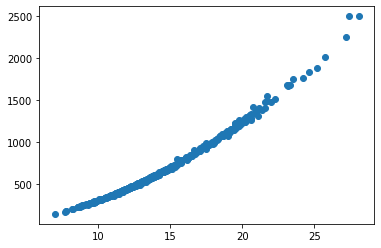

In [67]:
plt.figure()
plt.scatter(data['radius mean'],data['texture mean'])
plt.show()

In [68]:
corr_dict = {}
for column in data.columns[2:]:
    corr_dict[column] = data['Classification'].corr(data[column])
    
corr_dict   

{'radius mean': 0.7300285113754553,
 'radius std': 0.4151852998452038,
 'largest radius': 0.7426355297258318,
 'texture mean': 0.7089838365853887,
 'texture std': 0.3585599650859317,
 'largest texture': 0.5965336775082523,
 'perimeter mean': 0.6963597071719052,
 'perimeter std': 0.7766138400204347,
 'largest perimeter': 0.33049855426254665,
 'area mean': -0.012837602698432333,
 'area std': 0.5671338208247169,
 'largest area': -0.008303332973877418,
 'smoothness mean': 0.5561407034314823,
 'smoothness std': 0.5482359402780235,
 'largest smoothness': -0.06701601057948722,
 'compactness mean': 0.292999244248858,
 'compactness std': 0.25372976598083,
 'largest compactness': 0.4080423327165041,
 'concavity mean': -0.006521755870647965,
 'concavity std': 0.07797241739025602,
 'largest concavity': 0.7764537785950383,
 'concave points mean': 0.45690282139679766,
 'concave points std': 0.7829141371737581,
 'largest (no. of)concave points': 0.73382503492105,
 'symmetry mean': 0.4214648610664021,

We can see that most parameters have a somewhat positive linear relationship with whether the patient is classified as benign or malignant. The ones with the highest linear relation are concavity and fractal dimension among others. We have an idea of what our dataset looks like. So, now we can move to prediction using the k-nearest neighbour algorithm.

### K-Nearest Neighbour Classification

This is a classification algorithm which considers every input as a point in an n-dimensional space. It takes the k nearest (distance-wise) neighbours from the training set given to the algorithm and takes the higher number of classes among those. Finally, it outputs the class as detected.

We will first divide the data into a training set and a test set.

In [69]:
def train_test_split(df):
    np.random.seed(0)
    training = np.random.rand(len(df))<0.6
    train = df[training]
    test = df[~training]
    return train, test

In [70]:
train_data = train_test_split(data)[0].set_index(['ID','Classification'])
test_data = train_test_split(data)[1].set_index(['ID'])
test_data_pred = test_data.drop('Classification',axis=1)

Next, we will find out the distance between a point given as the input and all of the rows of the training set.

In [73]:
def distance(row1, row2):
    sum_dist_squared = 0
    for i in range(len(row1)):
        sum_dist_squared += (row1[i]-row2[i])**2
        
    return np.sqrt(sum_dist_squared)

In [74]:
def knn(k, df, row_input):
    distances = {}
    for i in range(df.shape[0]):
        distances[df.index[i]] = distance(np.array(df.iloc[i]),row_input)
    distances_s = pd.Series(distances)
    sort_distances = distances_s.sort_values(ascending=True)
    k_nearest_neighbours = sort_distances[:k].reset_index().rename(columns = {'level_0' : 'ID', 
                                                                              'level_1' : 'Classification',
                                                                               0: 'distance'})
    k_nearest_neighbours = k_nearest_neighbours.set_index(['Classification'])                      
    return k_nearest_neighbours

In [75]:
def run_test(k, train, test):
    classifications = []
    for i in range(test.shape[0]):
        nearest_neighbours = knn(k, train, np.array(test.iloc[i]))
        if sum(nearest_neighbours.index == 1) > sum(nearest_neighbours.index == 0):
            class_i = 1
        else:
            class_i = 0
        classifications.append(class_i)
    test_data_pred['Classification prediction'] = classifications
    return test_data_pred  

In [76]:
k_three = run_test(3, train_data, test_data_pred)

In [77]:
pred_k_three = k_three['Classification prediction']
actual_class = test_data['Classification']
accuracy_3 = sum(actual_class == pred_k_three)/len(actual_class)
accuracy_3

0.9203539823008849

In [18]:
k_five = run_test(5, train_data, test_data_pred)
pred_k_five = k_five['Classification prediction']
accuracy_5 = sum(actual_class == pred_k_five)/len(actual_class)
accuracy_5

0.9247787610619469

Now, we will try to split the dataset into three separate datasets consisting of the columns of mean, standard deviation and largest values of the parameters in order to try and get a better accuracy.

In [78]:
all_columns = data.columns
all_columns

Index(['ID', 'Classification', 'radius mean', 'radius std', 'largest radius',
       'texture mean', 'texture std', 'largest texture', 'perimeter mean',
       'perimeter std', 'largest perimeter', 'area mean', 'area std',
       'largest area', 'smoothness mean', 'smoothness std',
       'largest smoothness', 'compactness mean', 'compactness std',
       'largest compactness', 'concavity mean', 'concavity std',
       'largest concavity', 'concave points mean', 'concave points std',
       'largest (no. of)concave points', 'symmetry mean', 'symmetry std',
       'largest symmetry', 'fractal dimension mean', 'fractal dimension std',
       'largest fractal dimension'],
      dtype='object')

In [79]:
mean_columns = all_columns[all_columns.str.contains('mean')]
std_columns = all_columns[all_columns.str.contains('std')]
largest_columns = all_columns[all_columns.str.contains('largest')]

In [82]:
mean_data = data[mean_columns]
mean_data = pd.concat([mean_data, data[['Classification', 'ID']]], axis=1)
std_data = data[std_columns]
std_data = pd.concat([std_data, data[['Classification', 'ID']]], axis=1)
largest_data = data[largest_columns]
largest_data = pd.concat([largest_data, data[['Classification', 'ID']]], axis=1)

In [83]:
training = []
testing = []
for dat in [mean_data, std_data, largest_data]:
    training.append(train_test_split(dat)[0])
    testing.append(train_test_split(dat)[1])

In [86]:
mean_train = training[0].set_index(['ID', 'Classification'])
std_train = training[1].set_index(['ID', 'Classification'])
largest_train = training[2].set_index(['ID', 'Classification'])
mean_test = testing[0].set_index('ID')
std_test = testing[1].set_index('ID')
largest_test = testing[2].set_index('ID')
mean_test_pred = mean_test.drop('Classification',axis=1)
std_test_pred = std_test.drop('Classification',axis=1)
largest_test_pred = largest_test.drop('Classification',axis=1)

In [87]:
mean_3 = run_test(3, mean_train, mean_test_pred)
pred_mean = mean_3['Classification prediction']
actual_class_mean = mean_test['Classification']
accuracy_mean = sum(pred_mean == actual_class_mean)/len(actual_class_mean)
accuracy_mean

0.9070796460176991

In [88]:
std = run_test(3, std_train, std_test_pred)
pred_std = std['Classification prediction']
actual_class_std = std_test['Classification']
accuracy_std = sum(pred_std == actual_class_std)/len(actual_class_std)
accuracy_std

0.9292035398230089

In [89]:
largest_ = run_test(3, largest_train, largest_test_pred)
pred_largest = largest_['Classification prediction']
actual_class_largest = largest_test['Classification']
accuracy_largest = sum(pred_largest == actual_class_largest)/len(actual_class_largest)
accuracy_largest

0.9070796460176991